ADABOOST MODEL
> 
A RANDOM SAMPLE OF 5000 ROWS OR COMPOUNDS ARE SELECTED FROM THE INACTIVE CLASS FOR MODEL BUILDING
>
No further undersampling is done 

IMPORTING LIBRARIES AND DATA

In [1]:
# the big three
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# training algorithms
from sklearn.ensemble import AdaBoostClassifier

# resampling algorithms
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# importing other libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

# importing metrics 
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, roc_curve, auc, balanced_accuracy_score

In [5]:
# read dataset into dataframe
df = pd.read_csv("../../../data/final.csv")
df.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,Activity
0,2,0,0,1,4,0,0,0,0,0,...,0,1,0,0,0,5.45943,-0.367670,0.363636,4.29650,0
1,1,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,5.08746,-0.772128,0.240000,2.31134,0
2,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.70044,-0.295978,0.300000,1.67610,0
3,2,0,0,1,3,0,0,0,0,0,...,0,1,1,0,0,5.49185,-0.357977,0.352941,2.63932,0
4,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.64386,-0.274183,0.315789,1.41996,0


In [6]:
# checking dimension of dataset
df.shape

(195244, 778)

In [7]:
# checking distribution of actives and inactives in dataset
df.Activity.value_counts()

0    194888
1       356
Name: Activity, dtype: int64

In [8]:
# creating new dataframes for active class and inactive class
df_0 = df.query("Activity == 0")
df_1 = df.query("Activity == 1")
len(df_0), len(df_1)

(194888, 356)

In [11]:
# randomly selecting 5000 active compounds from the inactive data
df_0 = df_0.sample(5000, random_state=56)
df_0

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,Activity
63845,1,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,5.24793,-0.785198,0.193548,1.615340,0
87234,2,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,5.16993,-0.352843,0.428571,2.189140,0
148131,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,5.16993,-0.777526,0.206897,3.430500,0
5862,2,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,4.95420,-0.286849,0.521739,2.864490,0
93131,0,0,0,1,1,1,0,0,0,0,...,0,1,0,0,0,5.08746,-0.273806,0.000000,3.038970,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149260,2,0,0,1,2,0,0,0,0,0,...,0,1,0,0,0,5.20945,-0.699350,0.461538,3.450520,0
63474,1,0,0,3,1,0,0,0,0,0,...,0,0,0,0,0,5.00000,-0.815024,0.230769,2.776630,0
14025,2,0,0,1,4,0,0,0,0,0,...,0,1,0,0,0,5.70044,-0.731618,0.285714,3.266380,0
51462,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.95420,-0.643440,0.250000,0.089549,0


In [12]:
# combining active data to inactive data to form complete dataframe for model training and testing

df = pd.concat([df_0, df_1], ignore_index=True)
df

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,Activity
0,1,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,5.24793,-0.785198,0.193548,1.61534,0
1,2,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,5.16993,-0.352843,0.428571,2.18914,0
2,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,5.16993,-0.777526,0.206897,3.43050,0
3,2,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,4.95420,-0.286849,0.521739,2.86449,0
4,0,0,0,1,1,1,0,0,0,0,...,0,1,0,0,0,5.08746,-0.273806,0.000000,3.03897,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.24800,-0.798000,0.414000,3.01100,1
5352,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.20900,-0.790000,0.429000,2.78800,1
5353,1,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,4.90700,-0.717000,0.240000,3.17900,1
5354,3,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,5.55500,-0.767000,0.514000,4.46500,1


There are 5356 rows which is equal to 5000 and 356 actives. We will now use SMOTE to oversample the minority class, the actives to 5,000 before model building

0    5000
1     356
Name: Activity, dtype: int64


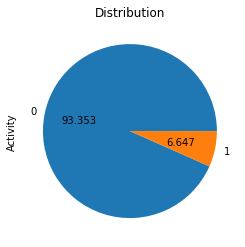

In [13]:
# divide dataframe into features, X and target y
X = df.drop(['Activity'],axis=1)
y = df['Activity']

# checking class distribution
print(y.value_counts())

# visualizing class distribution
ax = y.value_counts().plot(kind = 'pie', autopct = '%.3f')
ax.set_title("Distribution");

DIVIDING INTO TRAIN AND TEST DATASET

The training and test data have the following dimensions:
(4284, 777)(1072, 777)
The class distribution of the train data:
0    4000
1     284
Name: Activity, dtype: int64


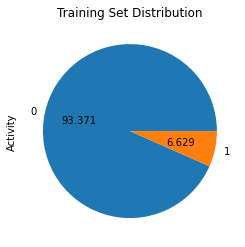

In [14]:
# dividing datasets into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# checking dimensions of train and test dataset
print("The training and test data have the following dimensions:\n{}{}".format(X_train.shape, X_test.shape))

# checking class distribution of train dataset
print("The class distribution of the train data:\n{}".format(y_train.value_counts()))

# visualizing class distribution of train dataset
ax = y_train.value_counts().plot(kind = 'pie', autopct = '%.3f')
ax.set_title("Training Set Distribution");

REMOVING LOW VARIANCE FEATURES
> 
The variance threshold function will remove columns that dont meet a certain threshold. This is done to improve model performance
> 
There are two different thresholds for this. Use the second one only when MinMaxScalar was used. You can use only one threshold

In [15]:
vt = VarianceThreshold(threshold=(.8 * (1 - .8)))

# Fit
_ = vt.fit(X_train)

# Get the mask
mask = vt.get_support()

# Subset the DataFrame
X_train = X_train.loc[:, mask]
X_test = X_test.loc[:, mask]

X_train.shape, X_test.shape

((4284, 356), (1072, 356))

In [16]:
# checking the distribution of the activity column of the test dataset

y_test.value_counts()

0    1000
1      72
Name: Activity, dtype: int64

The number of rows in the dataset remain the same however the number of columns have reduced

ADABOOST MODEL TRAINING
> 
For this section, the model is trained on either unsampled data or resampled data.

RESAMPLING USING SMOTE
> 
The dataset is resampled using SMOTE to obtain a active:inactive ratio of 1:1
> 
**THIS STEP SHOULD BE SKIPPED IF NO RESAMPLING WILL BE DONE**

OVERSMAPLING WITH SMOTE

In [17]:
over = SMOTE(sampling_strategy=1)
X_train, y_train = over.fit_resample(X_train, y_train)

# checking class distribution on resampled dataset
print(y_train.value_counts())

0    4000
1    4000
Name: Activity, dtype: int64


The dataset is now balanced. 

TRAINING MODELS

In [18]:
# creating model object
clf = AdaBoostClassifier()

# training model
clf.fit(X_train, y_train)

AdaBoostClassifier()

PREDICTIONS

In [19]:
# predicting on train dataset
train_predictions = clf.predict(X_train)    

# predicting on test dataset
test_predictions = clf.predict(X_test)

If the performance of the model on the training dataset is significantly better than the performance on the test dataset, then the model may have overfit the training dataset.

CHECKING METRICS
> 
The metrics will be checked for both the training data and the tes dataset
>
For the confusion matrix: <br>
> 
True Negative (Top-Left Quadrant)<br>
False Positive (Top-Right Quadrant)<br>
False Negative (Bottom-Left Quadrant)<br>
True Positive (Bottom-Right Quadrant)<br>

TRAINING DATA

Accuracy Score:  0.95675
Balanced Accuracy:  0.95675
Precision Score:  0.9535749751737835
Recall Score:  0.96025
F1 Score:  0.9569008470353763
MCC:  0.9135223815725261
AUROC:  0.9912745
Average:  0.9481996407563372


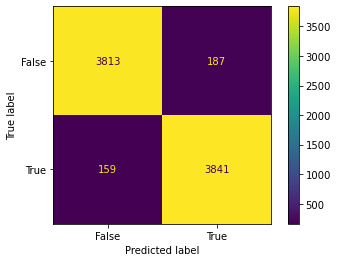

In [20]:
accuracy_train = accuracy_score(y_train, train_predictions)
balanced_accuracy_train = balanced_accuracy_score(y_train, train_predictions)
precision_train = precision_score(y_train, train_predictions)
recall_train = recall_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions)
mcc_train = matthews_corrcoef(y_train, train_predictions)

pred_prob = clf.predict_proba(X_train)[:,1]
auroc_train = roc_auc_score(y_train, pred_prob)

avg_train = np.mean([balanced_accuracy_train, precision_train, recall_train, f1_train, mcc_train])

print("Accuracy Score: ", accuracy_train)
print("Balanced Accuracy: ", balanced_accuracy_train)
print("Precision Score: ", precision_train)
print("Recall Score: ", recall_train)
print("F1 Score: ", f1_train)
print("MCC: ", mcc_train)
print("AUROC: ", auroc_train)

print("Average: ", avg_train)

cm = confusion_matrix(y_train, train_predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

TEST DATA

Accuracy Score:  0.9085820895522388
Balanced Accuracy:  0.7254444444444444
Precision Score:  0.37
Recall Score:  0.5138888888888888
F1 Score:  0.4302325581395348
MCC:  0.3880633683681407
AUROC:  0.8918472222222221
Average:  0.48552585196820175


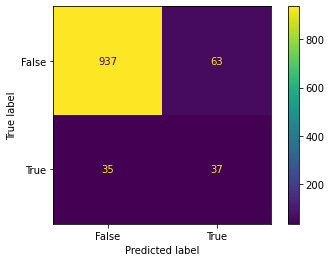

In [21]:
accuracy_test = accuracy_score(y_test, test_predictions)
balanced_accuracy_test = balanced_accuracy_score(y_test, test_predictions)
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions)
mcc_test = matthews_corrcoef(y_test, test_predictions)

pred_prob = clf.predict_proba(X_test)
auroc_test = roc_auc_score(y_test, pred_prob[:,1])

#taking the mean of balanced accuracy, precision, recall, f1 and mcc
avg_test = np.mean([balanced_accuracy_test, precision_test, recall_test, f1_test, mcc_test])

print("Accuracy Score: ", accuracy_test)
print("Balanced Accuracy: ", balanced_accuracy_test)
print("Precision Score: ", precision_test)
print("Recall Score: ", recall_test)
print("F1 Score: ", f1_test)
print("MCC: ", mcc_test)
print("AUROC: ", auroc_test)

print("Average: ", avg_test)

cm = confusion_matrix(y_test, test_predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

PLOTTING THE AUROC CURVE
> 
This is done for only the test data

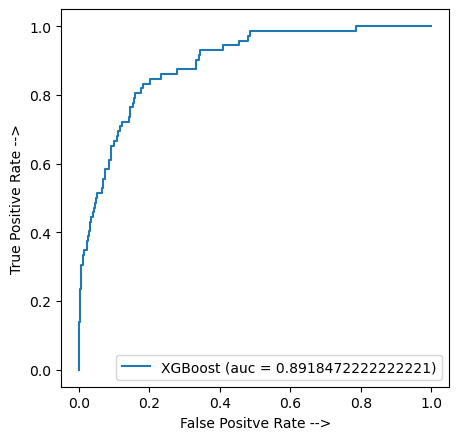

In [22]:
fpr, tpr, threshold = roc_curve(y_test, pred_prob[:, 1])
auc_score = auc(fpr, tpr)

plt.figure(figsize = (5, 5), dpi = 100)
plt.plot(fpr, tpr, label = 'XGBoost (auc = {})' .format(auc_score))
plt.xlabel('False Positve Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()